In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Construyendo un modelo

---



In [7]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

Files already downloaded and verified
Files already downloaded and verified


In [0]:
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

In [4]:
len(full_data_set)

50000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat
horse
frog
deer


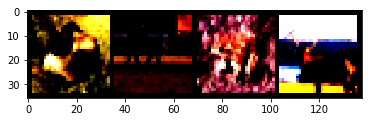

In [9]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()


classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [0]:
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [11]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [0]:
model = nn.Sequential(
          nn.Linear(3 * 32 * 32, 512),
          nn.Tanh(),
          nn.Linear(512, 2)
        )

In [0]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [0]:
x = torch.tensor([1.0, 2.0, 3.0])


In [16]:
softmax(x).sum()

tensor(1.)

In [0]:
model = nn.Sequential(
          nn.Linear(3 * 32 * 32, 512),
          nn.Tanh(),
          nn.Linear(512, 2),
          nn.Softmax(dim=1)
        )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

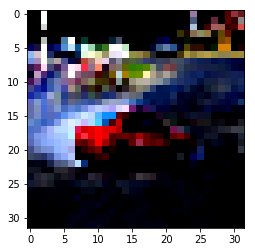

In [19]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [20]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5255, 0.4745]], grad_fn=<SoftmaxBackward>)

In [0]:
_, index = torch.max(out, dim=1)

In [22]:
print('->',class_names[label],' model:',class_names[index])

-> car  model: car


# Implementado un clasificador totalmente conectado

---



In [0]:
model = nn.Sequential(
          nn.Linear(3 * 32 * 32, 512),
          nn.Tanh(),
          nn.Linear(512, 2),
          nn.LogSoftmax(dim=1)
        )

loss_function = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

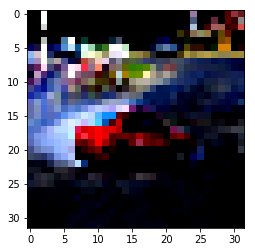

In [26]:
img, label = data_set[20]
plt.imshow(img.permute(1, 2, 0))
class_names[label]


In [28]:

out = model(img.view(-1).unsqueeze(0))
print(out)

print('->',class_names[label],' model:',class_names[index])

tensor([[-0.7759, -0.6167]], grad_fn=<LogSoftmaxBackward>)
-> car  model: car


In [39]:
model = nn.Sequential(
          nn.Linear(3 * 32 * 32, 512),
          nn.Tanh(),
          nn.Linear(512, 2),
          nn.LogSoftmax(dim=1)
        )

loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 5

for epoch in range(n_epochs):
    for img, label in data_set:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_function(out, torch.tensor([label]))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        

Epoch: 0, Loss: 0.000454
Epoch: 1, Loss: 0.622884
Epoch: 2, Loss: 0.000384
Epoch: 3, Loss: 0.051433
Epoch: 4, Loss: 0.000017


In [40]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
          nn.Linear(3 * 32 * 32, 512),
          nn.Tanh(),
          nn.Linear(512, 2),
          nn.LogSoftmax(dim=1)
        )

loss_function = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        

Epoch: 0, Loss: 0.483763
Epoch: 1, Loss: 0.331189
Epoch: 2, Loss: 0.324415
Epoch: 3, Loss: 0.402131
Epoch: 4, Loss: 0.252187
Epoch: 5, Loss: 0.308302
Epoch: 6, Loss: 0.239773
Epoch: 7, Loss: 0.712734
Epoch: 8, Loss: 0.260344
Epoch: 9, Loss: 0.316395
Epoch: 10, Loss: 0.122061
Epoch: 11, Loss: 0.150706
Epoch: 12, Loss: 0.254292
Epoch: 13, Loss: 0.309651
Epoch: 14, Loss: 0.464655
Epoch: 15, Loss: 0.210825
Epoch: 16, Loss: 0.205055
Epoch: 17, Loss: 0.399063
Epoch: 18, Loss: 0.143873
Epoch: 19, Loss: 0.225914
Epoch: 20, Loss: 0.144990
Epoch: 21, Loss: 0.088797
Epoch: 22, Loss: 0.101850
Epoch: 23, Loss: 0.071191
Epoch: 24, Loss: 0.065572
Epoch: 25, Loss: 0.111635
Epoch: 26, Loss: 0.257789
Epoch: 27, Loss: 0.086742
Epoch: 28, Loss: 0.074511
Epoch: 29, Loss: 0.059934
Epoch: 30, Loss: 0.143438
Epoch: 31, Loss: 0.069244
Epoch: 32, Loss: 0.051873
Epoch: 33, Loss: 0.034101
Epoch: 34, Loss: 0.065391
Epoch: 35, Loss: 0.035495
Epoch: 36, Loss: 0.073610
Epoch: 37, Loss: 0.031068
Epoch: 38, Loss: 0.032

In [41]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.877000


In [42]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out

tensor([[-7.1526e-06, -1.1820e+01]], grad_fn=<LogSoftmaxBackward>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


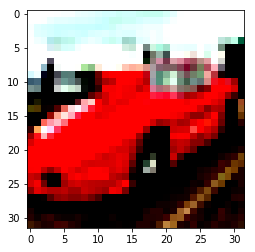

In [43]:
print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

# Mejoras, limitaciones y conclusiones

---



In [44]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
          nn.Linear(3072, 1024),
          nn.Tanh(),
          nn.Linear(1024, 512),
          nn.Tanh(),
          nn.Linear(512, 128),
          nn.Tanh(),
          nn.Linear(128, 2)
        )

loss_function = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in train_loader:
        out = model(img.view(img.shape[0], -1))
        loss = loss_function(out, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
        

Epoch: 0, Loss: 0.419745
Epoch: 1, Loss: 0.463121
Epoch: 2, Loss: 0.349357
Epoch: 3, Loss: 0.392053
Epoch: 4, Loss: 0.627316
Epoch: 5, Loss: 0.596408
Epoch: 6, Loss: 0.432949
Epoch: 7, Loss: 0.284210
Epoch: 8, Loss: 0.206800
Epoch: 9, Loss: 0.260543
Epoch: 10, Loss: 0.314057
Epoch: 11, Loss: 0.316395
Epoch: 12, Loss: 0.379087
Epoch: 13, Loss: 0.614842
Epoch: 14, Loss: 0.061629
Epoch: 15, Loss: 0.288330
Epoch: 16, Loss: 0.266995
Epoch: 17, Loss: 0.342613
Epoch: 18, Loss: 0.444597
Epoch: 19, Loss: 0.170873
Epoch: 20, Loss: 0.154113
Epoch: 21, Loss: 0.116633
Epoch: 22, Loss: 0.091044
Epoch: 23, Loss: 0.177530
Epoch: 24, Loss: 0.111497
Epoch: 25, Loss: 0.060874
Epoch: 26, Loss: 0.072100
Epoch: 27, Loss: 0.045973
Epoch: 28, Loss: 0.029459
Epoch: 29, Loss: 0.376824
Epoch: 30, Loss: 0.051944
Epoch: 31, Loss: 0.060643
Epoch: 32, Loss: 0.011929
Epoch: 33, Loss: 0.120630
Epoch: 34, Loss: 0.010177
Epoch: 35, Loss: 0.006588
Epoch: 36, Loss: 0.002237
Epoch: 37, Loss: 0.593091
Epoch: 38, Loss: 0.021

In [45]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 0.865000


In [46]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [47]:
sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


correct: car   model: cat


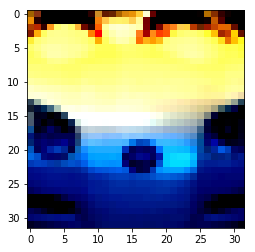

In [48]:
image = request.urlretrieve('https://i.pinimg.com/originals/43/bc/47/43bc47066bb8b2fa4fe7cc8e82cc3714.jpg','test,jpg')
                            
img = Image.open(image[0])

preprocess = transforms.Compose([
        transforms.Resize(48),
        transforms.CenterCrop(32),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.4915, 0.4823, 0.4468],
            std=[0.2470, 0.2435, 0.2616]
        )])

img_t = preprocess(img)
out = model(img_t.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
print('correct: car ',' model:',class_names[index])
plt.imshow(img_t.permute(1, 2, 0))